In [2]:
import pandas as pd
import numpy as np
# ─── Celda 1: importar librerías y cargar los datos ───

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Si tienes un script propio para cargar ("load_data.py"):
# from src.data.load_data import load_raw_pokemon
# df = load_raw_pokemon("Pokemon.csv")

# O bien, lee directamente el CSV procesado:
df = pd.read_csv("data/processed/pokemon_clusterizado.csv")

# Verifica que efectivamente df tenga las columnas que esperas:
df.head()

# Cargar datos (suponiendo que ya lo tenemos en df)
# df = pd.read_csv("data/processed/pokemon_clusterizado.csv")

# Extraemos solo las columnas que usaremos:
cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
sub = df[cols].copy()

# Paso 1: calcular los máximos para normalizar
max_hp       = sub["HP"].max()
max_defense  = sub["Defense"].max()
max_attack   = sub["Attack"].max()
max_spatk    = sub["Sp. Atk"].max()
max_speed    = sub["Speed"].max()

# Paso 2: construir los índices crudos
sub["ÍndiceExtro"] = ( sub["Speed"]  / max_speed +
                       (sub["Attack"] + sub["Sp. Atk"]) / (max_attack + max_spatk) )
sub["ÍndiceIntro"] = ( sub["Defense"] / max_defense +
                       sub["HP"]      / max_hp )

# Paso 3: normalizar cada índice al rango [0,1]
# (restar min, dividir por rango)
sub["ÍndiceExtro_norm"] = (sub["ÍndiceExtro"] - sub["ÍndiceExtro"].min()) \
                           / (sub["ÍndiceExtro"].max() - sub["ÍndiceExtro"].min())

sub["ÍndiceIntro_norm"] = (sub["ÍndiceIntro"] - sub["ÍndiceIntro"].min()) \
                           / (sub["ÍndiceIntro"].max() - sub["ÍndiceIntro"].min())

# Paso 4: decidir la personalidad según diferencia
epsilon = 0.1  # umbral de tolerancia
def asignar_personalidad(row):
    diff = row["ÍndiceExtro_norm"] - row["ÍndiceIntro_norm"]
    if diff > epsilon:
        return "Extrovertido"
    elif diff < -epsilon:
        return "Introvertido"
    else:
        return "Neutral/Equilibrado"

sub["Personalidad"] = sub.apply(asignar_personalidad, axis=1)

# Unimos esa etiqueta de personalidad al DF original
df["Personalidad"] = sub["Personalidad"]

# Veamos cuántos quedan en cada categoría
print(df["Personalidad"].value_counts())


Personalidad
Neutral/Equilibrado    360
Extrovertido           258
Introvertido           182
Name: count, dtype: int64


In [3]:
# ─── Celda 2: definir columnas y calcular máximos ───

# 2.1 Columnas de estadísticas que necesitamos
cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 2.2 Creamos 'sub' copiando solo esas columnas (para no modificar df original)
sub = df[cols].copy()

# 2.3 Calculamos máximos de cada uno
max_hp       = sub["HP"].max()
max_defense  = sub["Defense"].max()
max_attack   = sub["Attack"].max()
max_spatk    = sub["Sp. Atk"].max()
max_speed    = sub["Speed"].max()

print("Máximos calculados:")
print(f" max_hp       = {max_hp}")
print(f" max_defense  = {max_defense}")
print(f" max_attack   = {max_attack}")
print(f" max_spatk    = {max_spatk}")
print(f" max_speed    = {max_speed}")


Máximos calculados:
 max_hp       = 255
 max_defense  = 230
 max_attack   = 190
 max_spatk    = 194
 max_speed    = 180


In [7]:
import pandas as pd

# Cargamos el DataFrame principal
df = pd.read_csv("data/processed/pokemon_clusterizado.csv")

# Verificamos qué columnas contiene este df
print(df.columns.tolist())
# Por ejemplo: ['#', 'Name', 'Type 1', ..., 'Speed', 'cluster', 'PCA1', 'PCA2']

df.head(3)


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'cluster', 'PCA1', 'PCA2', 'atk_def_ratio', 'perfil']


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster,PCA1,PCA2,atk_def_ratio,perfil
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0,-1.556375,0.021482,1.000000,Básico
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1,-0.362867,0.050269,0.984127,Relámpagos Letales
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1,1.280152,0.062720,0.987952,Relámpagos Letales


In [8]:
# Columnas que usaremos para índices "Intro"/"Extro"
cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# Creamos una copia para manipularla sin tocar df directamente
sub = df[cols].copy()

# Calculamos los valores máximos (para normalizar luego)
max_hp      = sub["HP"].max()
max_defense = sub["Defense"].max()
max_attack  = sub["Attack"].max()
max_spatk   = sub["Sp. Atk"].max()
max_speed   = sub["Speed"].max()

# Calculamos los índices “Extro” e “Intro”
sub["ÍndiceExtro"] = ( sub["Speed"] / max_speed ) \
                   + ((sub["Attack"] + sub["Sp. Atk"]) / (max_attack + max_spatk))

sub["ÍndiceIntro"] = ( sub["Defense"] / max_defense ) \
                   + ( sub["HP"]      / max_hp    )

# Normalizamos entre 0 y 1 (restando min y dividiendo por rango)
sub["ÍndiceExtro_norm"] = (sub["ÍndiceExtro"] - sub["ÍndiceExtro"].min()) \
                        / (sub["ÍndiceExtro"].max() - sub["ÍndiceExtro"].min())

sub["ÍndiceIntro_norm"] = (sub["ÍndiceIntro"] - sub["ÍndiceIntro"].min()) \
                        / (sub["ÍndiceIntro"].max() - sub["ÍndiceIntro"].min())

# Vemos que en ‘sub’ ya aparezcan esas columnas:
sub.head(3)



,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,ÍndiceExtro,ÍndiceIntro,ÍndiceExtro_norm,ÍndiceIntro_norm
0,45,49,49,65,65,45,0.546875,0.389514,0.276181,0.213709
1,60,62,63,80,80,60,0.703125,0.509207,0.368583,0.317747
2,80,82,83,100,100,80,0.918403,0.674595,0.495893,0.461504


In [9]:
epsilon = 0.1  # Umbral para considerar "Neutral/Equilibrado"

def asignar_personalidad(row):
    diff = row["ÍndiceExtro_norm"] - row["ÍndiceIntro_norm"]
    if diff > epsilon:
        return "Extrovertido"
    elif diff < -epsilon:
        return "Introvertido"
    else:
        return "Neutral/Equilibrado"

# Aplicamos la función en ‘sub’
sub["Personalidad"] = sub.apply(asignar_personalidad, axis=1)

# ── Aquí volcamos TODAS las columnas que queremos llevar a df ──
df["ÍndiceExtro_norm"] = sub["ÍndiceExtro_norm"]
df["ÍndiceIntro_norm"] = sub["ÍndiceIntro_norm"]
df["Personalidad"   ]  = sub["Personalidad"]

# Verificamos que df ahora tenga estas tres nuevas columnas:
print(df.columns.tolist())
# Ejemplo de salida: ['#','Name','Type 1',...,'PCA1','PCA2',
#                     'ÍndiceExtro_norm', 'ÍndiceIntro_norm', 'Personalidad']


['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'cluster', 'PCA1', 'PCA2', 'atk_def_ratio', 'perfil', 'ÍndiceExtro_norm', 'ÍndiceIntro_norm', 'Personalidad']


In [12]:
df[["Name", "Personalidad" ]].head()


,Name,Personalidad
0,Bulbasaur,Neutral/Equilibrado
1,Ivysaur,Neutral/Equilibrado
2,Venusaur,Neutral/Equilibrado
3,VenusaurMega Venusaur,Neutral/Equilibrado
4,Charmander,Extrovertido


C:\Users\Jsar0\AppData\Local\Temp\ipykernel_25780\3992175494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


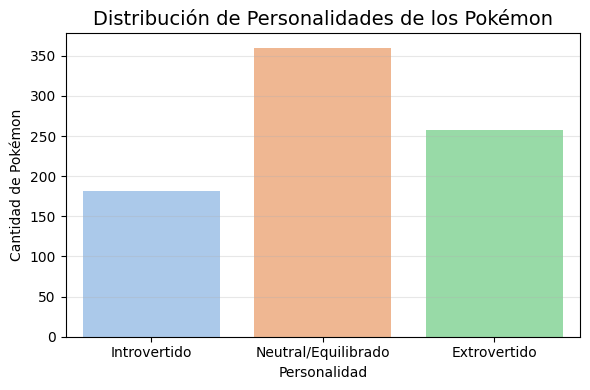

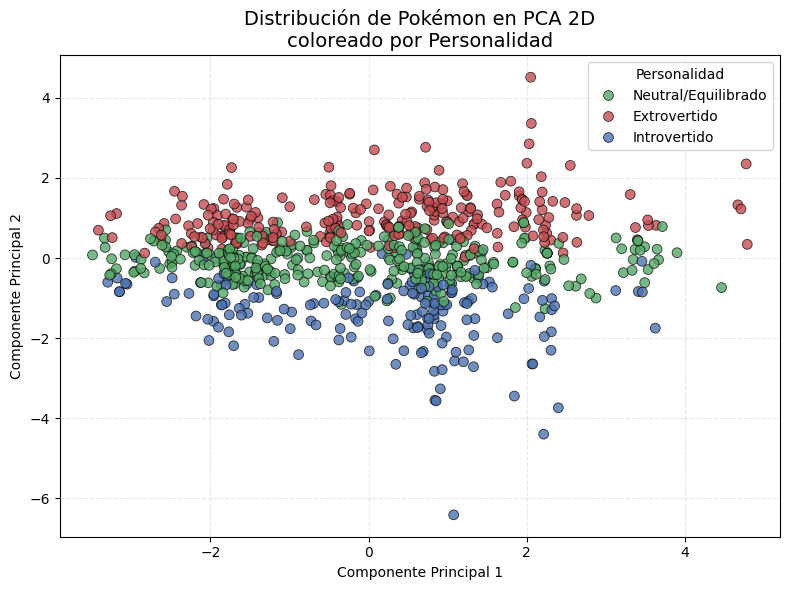

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ── 1. Countplot de Personalidad ──
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Personalidad",
    palette="pastel",
    order=["Introvertido","Neutral/Equilibrado","Extrovertido"]
)
plt.title("Distribución de Personalidades de los Pokémon", fontsize=14)
plt.xlabel("Personalidad")
plt.ylabel("Cantidad de Pokémon")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# ── 2. Scatterplot en PCA 2D coloreado por Personalidad ──
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="Personalidad",
    palette={
        "Introvertido": "#4C72B0",
        "Neutral/Equilibrado": "#55A868",
        "Extrovertido": "#C44E52"
    },
    s=50,        # tamaño de los puntos
    alpha=0.8,   # transparencia para no “ensuciar” tanto
    edgecolor="k"
)
plt.title("Distribución de Pokémon en PCA 2D\ncoloreado por Personalidad", fontsize=14)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Personalidad", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
